### Classify the email using the binary classification method. Email Spam detection has two states:
1. Normal State – Not Spam
2. Abnormal State – Spam. 

### Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv


In [12]:
!kaggle datasets download balaka18/email-spam-classification-dataset-csv

Dataset URL: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv
License(s): ODbL-1.0




  0%|          | 0.00/1.66M [00:00<?, ?B/s]
 60%|██████    | 1.00M/1.66M [00:01<00:01, 680kB/s]
100%|██████████| 1.66M/1.66M [00:01<00:00, 1.15MB/s]
100%|██████████| 1.66M/1.66M [00:01<00:00, 1.02MB/s]


In [13]:
!tar -xf email-spam-classification-dataset-csv.zip

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [15]:
df = pd.read_csv(r'emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
df.drop("Email No.", axis = 1, inplace = True)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [17]:
df.isna().sum().value_counts()

0    3001
Name: count, dtype: int64

In [18]:
df.duplicated().sum()

541

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.columns = df.columns.str.lower()
df.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'prediction'],
      dtype='object', length=3001)

In [21]:
x = df.drop('prediction', axis=1)
y = df["prediction"]

In [22]:
y.value_counts()

prediction
0    3170
1    1461
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 43)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)

accuracy_score(y_test, y_pred_knn)

0.9083063646170443

In [26]:
print(classification_report(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('F1: ', f1_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       635
           1       0.87      0.84      0.85       292

    accuracy                           0.91       927
   macro avg       0.90      0.89      0.89       927
weighted avg       0.91      0.91      0.91       927

Recall:  0.839041095890411
Precision:  0.8657243816254417
F1:  0.8521739130434782


Text(50.722222222222214, 0.5, 'Predicted Values')

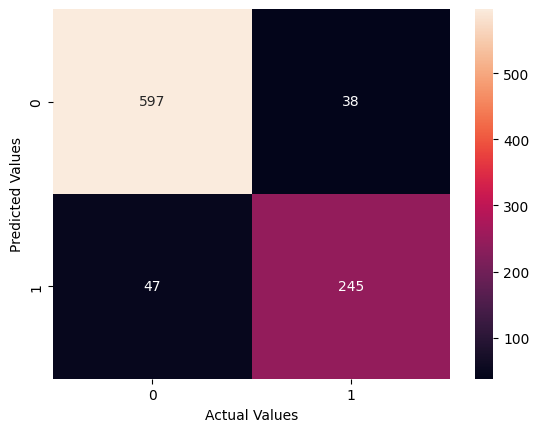

In [31]:
conf = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(conf, annot=True, fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [28]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')

svm_linear.fit(x_train, y_train)
pred = svm_linear.predict(x_test_scaled)

accuracy_score(pred, y_test)

e:\etc\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.6903991370010788

In [29]:

print(classification_report(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('F1: ', f1_score(y_test, pred))
print('\n\n')

              precision    recall  f1-score   support

           0       0.97      0.57      0.71       635
           1       0.50      0.96      0.66       292

    accuracy                           0.69       927
   macro avg       0.74      0.76      0.69       927
weighted avg       0.82      0.69      0.70       927

Recall:  0.9623287671232876
Precision:  0.5044883303411131
F1:  0.6619552414605419





Text(50.722222222222214, 0.5, 'Actual')

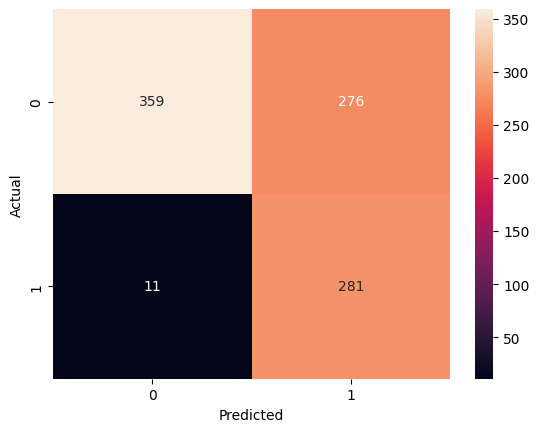

In [30]:
conf_svm = confusion_matrix(y_test, pred)
sns.heatmap(conf_svm, fmt='d', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")